✅ Dataset Shape: (8807, 14)

📌 Column Info:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
dtype: object

🔍 Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

📊 Summary Stats:
        show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


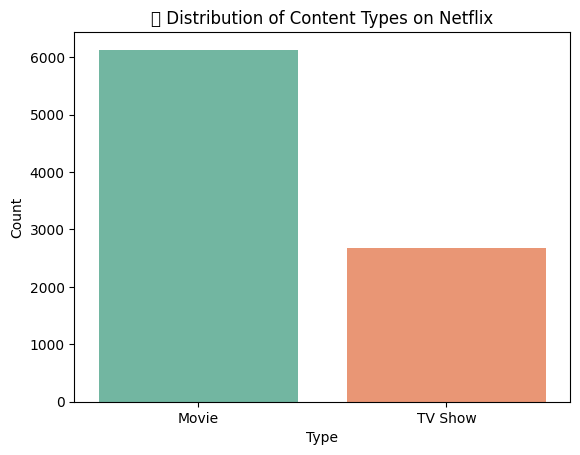

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


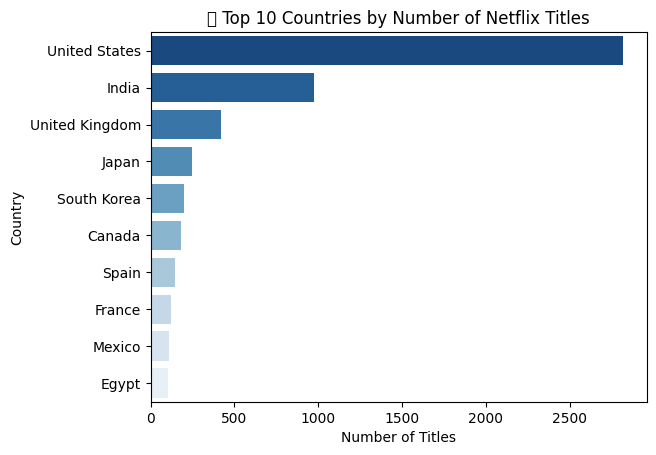

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128278 (\N{BOOKMARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


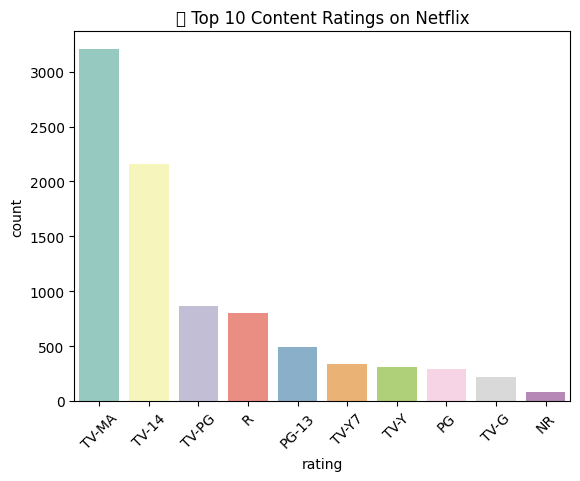

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


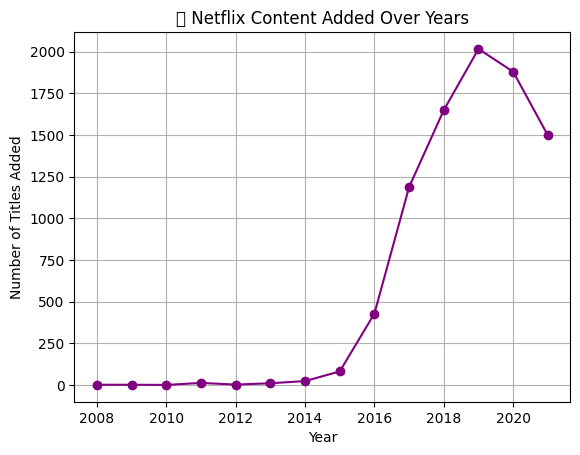

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


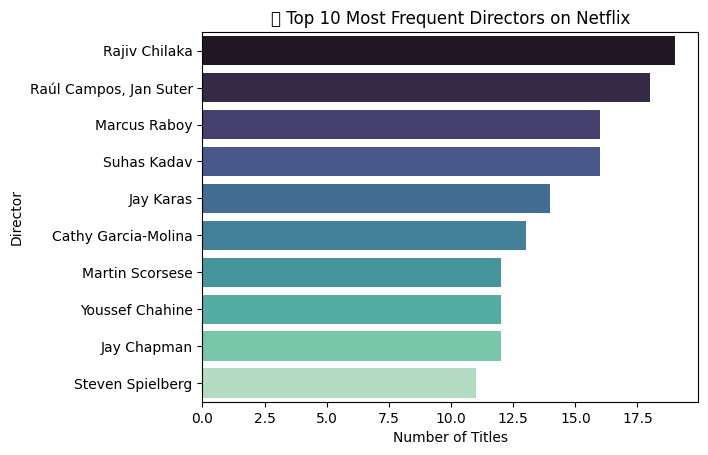

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


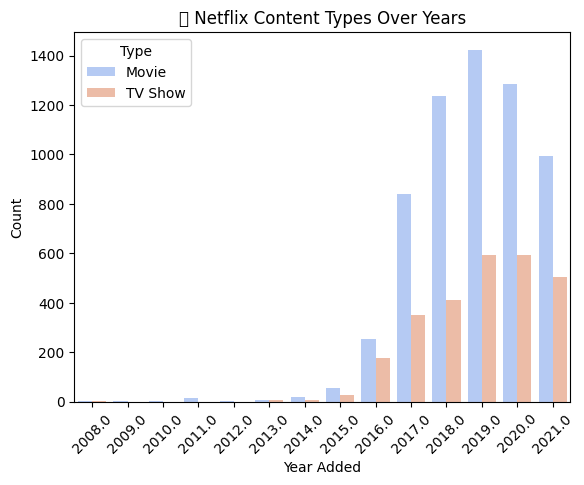

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Netflix dataset
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# Preprocessing
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Initial inspection
print("✅ Dataset Shape:", df.shape)
print("\n📌 Column Info:\n", df.dtypes)
print("\n🔍 Missing Values:\n", df.isnull().sum())
print("\n📊 Summary Stats:\n", df.describe(include='object'))

# Content Type Distribution
sns.countplot(data=df, x='type', palette='Set2')
plt.title("🎬 Distribution of Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Blues_r')
plt.title("🌍 Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Ratings distribution
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Set3')
plt.title("🔖 Top 10 Content Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()

# Year-wise content added
yearly = df['year_added'].value_counts().sort_index()
plt.plot(yearly.index, yearly.values, marker='o', linestyle='-', color='purple')
plt.title("📅 Netflix Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

# Top 10 Directors
top_directors = df['director'].value_counts().dropna().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title("🎬 Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

# Content Type vs Year
sns.countplot(data=df[df['year_added'].notna()], x='year_added', hue='type', palette='coolwarm')
plt.title("📈 Netflix Content Types Over Years")
plt.xticks(rotation=45)
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

